                    precision    recall  f1-score   support

00:17:88:47:20:f2:       0.50      0.07      0.12        42
00:1b:c7:fa:c3:e6:       1.00      0.99      0.99       184
00:22:cf:fd:c1:08:       0.00      0.00      0.00         3
00:a2:b2:b9:09:87:       0.94      0.13      0.23       121
04:5d:4b:a4:d0:2e:       0.69      0.25      0.37       272
34:76:c5:7f:91:07:       0.50      0.71      0.59       203
34:ea:34:76:ea:68:       0.50      0.55      0.52        33
38:56:10:00:1d:8c:       1.00      0.91      0.95        11
40:9f:38:e7:7f:09:       0.00      0.00      0.00         0
48:d6:d5:92:96:a2:       0.00      0.00      0.00       626
4c:ef:c0:17:e0:42:       0.38      0.12      0.19        41
6c:5a:b5:56:39:3e:       0.00      0.00      0.00       236
70:26:05:73:6e:31:       0.03      0.50      0.06         2
70:88:6b:10:22:83:       0.02      1.00      0.04        25
78:11:dc:55:76:4c:       0.00      0.00      0.00         1
80:c5:f2:0b:aa:a9:       0.00      0.00

Text(50.722222222222214, 0.5, 'actual')

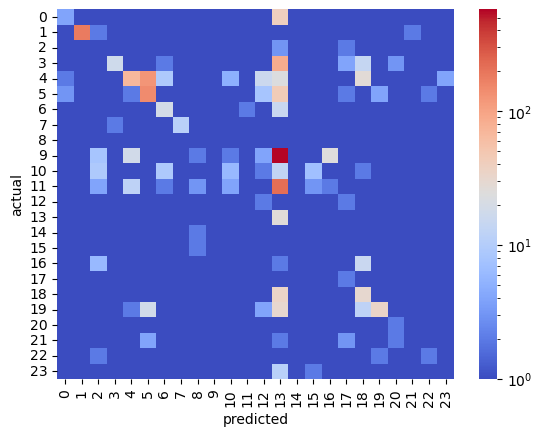

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Thu Oct 31 11:40:59 2024

@author: camer
"""

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

column_names = [
    "dataset", "start_date", "start_time", "duration", "reverseDelta", "IoTMac", "hostMac", "IoTIP", "IoTIP_int",
    "hostIP", "hostIP_int", "ipProto", "IoTPort", "hostPort", "PacketCount", "BytesCount", "reversePacketCount",
    "reverseBytesCount", "SmallPktCount", "LargePktCount", "NonEmptyPktCount", "DataByteCount", "AvgIAT",
    "FirstNonEmptyPktSize", "MaxPktSize", "StdevPayloadSize", "StdevIAT", "AvgPacketSize", "reverseSmallPktCount",
    "reverseLargePktCount", "reverseNonEmptyPktCount", "reverseDataByteCount", "reverseAvgIAT",
    "reverseFirstNonEmptyPktSize", "reverseMaxPktSize", "reverseStdevPayloadSize", "reverseStdevIAT",
    "reverseAvgPacketSize", "reverseFlowExists", "remote", "broadcast", "HTTP", "HTTPS", "DNS", "NTP", "TCP_others",
    "UDP_others", "year_month"
]
# Dropped dataset, IoTIP_int, hostIP_int, year_month
df2 = pd.read_csv('sample.csv', names = column_names)
df = df2.drop(columns=['IoTIP', 'hostMac', 'dataset', 'IoTIP_int', 'hostIP_int','hostIP'])
# Defines categorical variables
categories = ['IoTMac',  'ipProto', 'reverseFlowExists', 'remote', 'broadcast', 'HTTP', 'HTTPS', 'DNS', 'NTP', 'TCP_others', 'UDP_others']
for var in categories:
    df[var] = df[var].astype('category')

X = df.drop(columns=['IoTMac'])
y = df['IoTMac']

X = pd.get_dummies(X, drop_first=True)
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)

# Fits the model on the training data using Naive Bayes
model = GaussianNB()
model.fit(XTrain, yTrain)

yPred = model.predict(XTest)
print(classification_report(yTest, yPred, zero_division=0))
accuracy = accuracy_score(yTest, yPred)

print(f'Accuracy: {accuracy:.5f}')
# Shows true positives, true negatives, false positives, false negatives

cmatrix = confusion_matrix(yTest, yPred)
for f in cmatrix:
    f += 1
import seaborn as sns
from matplotlib.colors import LogNorm
sns.heatmap(cmatrix, annot=False, cmap='coolwarm', norm=LogNorm())
plt.xlabel("predicted")
plt.ylabel("actual")
